# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.metrics import r2_score
%matplotlib inline 
from textblob import TextBlob
import numpy as np
import math

# Reading listings file

In [2]:
df_listings = pd.read_csv('C:/D/data science nano degree/listings.csv')
df_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


# Fetching individual columns from the given sheet and their respective datatypes


In [4]:
df_listings_features=df_listings.dtypes.to_frame().reset_index().rename(columns={0:'datatype','index':'feature_name'})
df_listings_features.head()


,feature_name,datatype
0,id,int64
1,listing_url,object
2,scrape_id,int64
3,last_scraped,object
4,name,object


# Grouping features based on datatypes


In [5]:
for i,j in df_listings_features.groupby('datatype'):
    print(i,j)

int64                       feature_name datatype
0                               id    int64
2                        scrape_id    int64
16                         host_id    int64
50                    accommodates    int64
62                 guests_included    int64
64                  minimum_nights    int64
65                  maximum_nights    int64
68                 availability_30    int64
69                 availability_60    int64
70                 availability_90    int64
71                availability_365    int64
73               number_of_reviews    int64
90  calculated_host_listings_count    int64
float64                    feature_name datatype
29          host_listings_count  float64
30    host_total_listings_count  float64
45                     latitude  float64
46                    longitude  float64
51                    bathrooms  float64
52                     bedrooms  float64
53                         beds  float64
56                  square_feet  float64
7

# There are lots of cloumns which are str but should be float like features having currecy values, converting them to float


In [7]:
column_list_to_convert=['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']

for i in column_list_to_convert:
   df_listings[i]=df_listings[i].replace("['$,']",'',regex=True).astype(float)

# Histograms to visualise the data distribution of price related fields

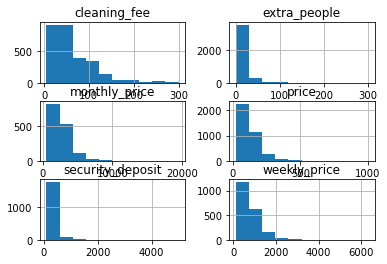

In [8]:
df_listings[column_list_to_convert].hist();

# Reading calendar file

In [9]:
df_calendar = pd.read_csv('C:/D/data science nano degree/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Busiest time to visit seattle


In [17]:
df_calendar['month']=pd.to_datetime(df_calendar.date).dt.strftime('%B')

df_calendar.price=df_calendar.price.replace("['$,']",'',regex=True).astype(float)

df_monthwise_total_listings=df_calendar.groupby(['month']).agg({'listing_id':['count'],'price':['median']})

df_monthwise_total_listings.columns=['total_listings','median_price']
df_monthwise_total_listings.reset_index(inplace=True)
df_monthwise_unavailable_listings=df_calendar[df_calendar.available=='f'].groupby(['month'],as_index=False).listing_id.count()

df_monthwise_business=pd.merge(df_monthwise_total_listings,df_monthwise_unavailable_listings,
                               how='inner',on='month').rename(columns={'listing_id':'unavailable_listings'})


df_monthwise_business['Occupied_percent']=df_monthwise_business['unavailable_listings']*100/df_monthwise_business['total_listings']

df_monthwise_business

,month,total_listings,median_price,unavailable_listings,Occupied_percent
0,April,114540,110.0,38503,33.615331
1,August,118358,114.0,42011,35.494855
2,December,118358,109.0,31297,26.442657
3,February,110722,100.0,37401,33.779195
4,January,114540,99.0,49603,43.306269
5,July,118358,115.0,44136,37.290255
6,June,114540,110.0,37296,32.561551
7,March,118358,100.0,34420,29.081262
8,May,118358,110.0,38387,32.432958
9,November,114540,106.0,32760,28.601362


# We can see that busiest month is January and least busy month is December while the median price is lowest in January ands highest in July.


In [18]:
df_monthwise_business.drop(columns=['total_listings','unavailable_listings'],inplace=True)
#df_monthwise_business[['month','Occupied_percent','median_price']].sort_values('Occupied_percent',ascending=False)

df_monthwise_business.sort_values('Occupied_percent',ascending=False)

,month,median_price,Occupied_percent
4,January,99.0,43.306269
5,July,115.0,37.290255
1,August,114.0,35.494855
3,February,100.0,33.779195
0,April,110.0,33.615331
6,June,110.0,32.561551
11,September,110.0,32.559804
8,May,110.0,32.432958
10,October,109.0,30.348603
7,March,100.0,29.081262


 # Reading reviews data

In [19]:
df_reviews=pd.read_csv('C:/D/data science nano degree/reviews.csv')

df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


# Writing a function to get polarity of reviews using textblob


In [20]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Adding a new column to get the polarity of all reviews

In [21]:
df_reviews['review_score']=df_reviews['comments'].apply(lambda x:getPolarity(str(x)))


# It will give a sorted view of best to worse rated listings based on reviews


In [65]:
df_reviews=df_reviews.groupby(['listing_id'],as_index=False).review_score.mean().sort_values('review_score',ascending=False)


df_reviews

,listing_id,review_score
2629,7922013,1.000000
2374,7429207,0.828333
1411,4652918,0.800000
2234,7075948,0.760000
1621,5383192,0.750000
...,...,...
94,186328,0.000000
2453,7614244,0.000000
3065,9183838,-0.188879
1651,5487934,-0.203333


# Top 10 positively reviews listing

In [66]:
df_reviews.head(10)


,listing_id,review_score
2629,7922013,1.000000
2374,7429207,0.828333
1411,4652918,0.800000
2234,7075948,0.760000
1621,5383192,0.750000
1113,3817141,0.735417
843,2919571,0.724107
3058,9154462,0.722619
1511,5002964,0.713750
2986,8891577,0.711111


# Top 10 negatively reviewed properties

In [67]:
df_reviews.tail(10)

,listing_id,review_score
300,790860,0.000000
1608,5336585,0.000000
1921,6392029,0.000000
1748,5902452,0.000000
2657,7969698,0.000000
94,186328,0.000000
2453,7614244,0.000000
3065,9183838,-0.188879
1651,5487934,-0.203333
1087,3766285,-0.325000


# Spliting the amenities

In [24]:
total_amenities=set()


for i in range(len(df_listings)):
    total_amenities.update(set(df_listings['amenities'][i].strip("\{\}").replace("\"","").split(',')))


total_amenities_list=list(total_amenities)
total_amenities_list

['',
 'Kitchen',
 'Elevator in Building',
 'Cat(s)',
 'First Aid Kit',
 'Suitable for Events',
 'Buzzer/Wireless Intercom',
 'TV',
 'Pets Allowed',
 'Gym',
 'Essentials',
 'Hair Dryer',
 'Hangers',
 'Indoor Fireplace',
 'Washer / Dryer',
 'Carbon Monoxide Detector',
 'Hot Tub',
 'Lock on Bedroom Door',
 'Pool',
 'Wireless Internet',
 'Iron',
 'Laptop Friendly Workspace',
 'Fire Extinguisher',
 'Breakfast',
 'Smoking Allowed',
 'Cable TV',
 'Dog(s)',
 'Doorman',
 'Air Conditioning',
 'Wheelchair Accessible',
 'Heating',
 'Pets live on this property',
 'Shampoo',
 'Washer',
 'Internet',
 'Family/Kid Friendly',
 'Free Parking on Premises',
 'Dryer',
 'Safety Card',
 '24-Hour Check-in',
 'Other pet(s)',
 'Smoke Detector']

# Creating columns for all amenities in listings dataframe

In [26]:


for i in total_amenities_list:
    df_listings[i]=0
    

for i in range(len(df_listings)):
    for x in total_amenities_list:
        if x in df_listings['amenities'][i].strip("\{\}").replace("\"","").split(','):
            df_listings.loc[x,i]=1
            
df_listings.count() 



id              3818
listing_url     3818
scrape_id       3818
last_scraped    3818
name            3818
                ... 
3813              16
3814              17
3815              20
3816              11
3817              22
Length: 3952, dtype: int64

# Selecting important features which looks relevant

In [43]:
imp_features = ['property_type','room_type','accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','square_feet', 'reviews_per_month',
         'guests_included', '24-Hour Check-in', 'Suitable for Events',
       'Pets live on this property', 'Dog(s)', 'Smoking Allowed',
       'Other pet(s)', 'Essentials', 'Wireless Internet',
       'Buzzer/Wireless Intercom', 'TV', 'Gym', 'Washer', 'Doorman', 'Dryer',
       'Hot Tub', 'Air Conditioning', 'Pets Allowed', 'Pool',
       'Hair Dryer', 'Fire Extinguisher', 'Breakfast', 'Washer / Dryer',
       'Laptop Friendly Workspace', 'Free Parking on Premises',
       'Lock on Bedroom Door', 'Cat(s)', 'Hangers', 'Family/Kid Friendly',
       'Carbon Monoxide Detector', 'Safety Card', 'Kitchen',
       'Elevator in Building', 'Internet', 'Shampoo', 'Smoke Detector',
       'Wheelchair Accessible', 'Iron', 'First Aid Kit',
       'Indoor Fireplace', 'Cable TV', 'Heating', 'host_is_superhost', 'neighbourhood_group_cleansed',
        'price','security_deposit','cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy']

df_listings_ml_data=df_listings[imp_features]

# Identifying categorical features

In [44]:
categorical_columns=df_listings_ml_data.select_dtypes(include=['object'])

# One hot encoding the categorical features

In [45]:
categorical_columns_one_hot=pd.get_dummies(categorical_columns)

# Preparing the final features dataframe for the model

In [46]:
df_listings_ml_data=df_listings_ml_data.drop(categorical_columns,axis=1)

df_listings_model_data=pd.concat([df_listings_ml_data,categorical_columns_one_hot],axis=1)

df_listings_model_data

,accommodates,bathrooms,bedrooms,beds,square_feet,reviews_per_month,guests_included,24-Hour Check-in,Suitable for Events,Pets live on this property,...,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,4.0,1.0,1.0,1.0,NaN,4.07,2.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,1,0
1,4.0,1.0,1.0,1.0,NaN,1.48,1.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
2,11.0,4.5,5.0,7.0,NaN,1.15,10.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
3,3.0,1.0,0.0,2.0,NaN,NaN,1.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
4,6.0,2.0,3.0,3.0,NaN,0.89,6.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
Smoking Allowed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
Other pet(s),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
Doorman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


# Checking for null values and filling it with 0 as default value

In [47]:
print(df_listings_model_data.count().to_markdown())

df_listings_model_data=df_listings_model_data.drop(['square_feet'],axis=1)

df_listings_model_data.fillna(0, inplace=True)

print(df_listings_model_data.count().to_markdown())

|                                                  |    0 |
|:-------------------------------------------------|-----:|
| accommodates                                     | 3818 |
| bathrooms                                        | 3802 |
| bedrooms                                         | 3812 |
| beds                                             | 3817 |
| square_feet                                      |   97 |
| reviews_per_month                                | 3191 |
| guests_included                                  | 3818 |
| 24-Hour Check-in                                 | 3818 |
| Suitable for Events                              | 3818 |
| Pets live on this property                       | 3818 |
| Dog(s)                                           | 3818 |
| Smoking Allowed                                  | 3818 |
| Other pet(s)                                     | 3818 |
| Essentials                                       | 3818 |
| Wireless Internet                     

# Creating X (input feature list) and Y (output) from model train data

In [68]:
y_data=df_listings_model_data['price']
x_data=df_listings_model_data.drop(['price'],axis=1)
x_data.columns.tolist()

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'reviews_per_month',
 'guests_included',
 '24-Hour Check-in',
 'Suitable for Events',
 'Pets live on this property',
 'Dog(s)',
 'Smoking Allowed',
 'Other pet(s)',
 'Essentials',
 'Wireless Internet',
 'Buzzer/Wireless Intercom',
 'TV',
 'Gym',
 'Washer',
 'Doorman',
 'Dryer',
 'Hot Tub',
 'Air Conditioning',
 'Pets Allowed',
 'Pool',
 'Hair Dryer',
 'Fire Extinguisher',
 'Breakfast',
 'Washer / Dryer',
 'Laptop Friendly Workspace',
 'Free Parking on Premises',
 'Lock on Bedroom Door',
 'Cat(s)',
 'Hangers',
 'Family/Kid Friendly',
 'Carbon Monoxide Detector',
 'Safety Card',
 'Kitchen',
 'Elevator in Building',
 'Internet',
 'Shampoo',
 'Smoke Detector',
 'Wheelchair Accessible',
 'Iron',
 'First Aid Kit',
 'Indoor Fireplace',
 'Cable TV',
 'Heating',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type

# Splitting the test and train datasets

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.3, random_state=21)


# linear regression model to predict the prices of listings based on features

In [50]:
lr_model = LinearRegression(normalize=True)
lr_model.fit(x_train, y_train)
y_test_pred = lr_model.predict(x_test)
score = r2_score(y_test, y_test_pred)
print(score)


0.5724752343489898



# Printing feature importances


In [52]:
df_coef=pd.DataFrame()

df_coef['feature']=x_train.columns
df_coef['importance']=lr_model.coef_
    

print(df_coef.sort_values('importance',ascending=False).to_markdown())
    

|    | feature                                          |     importance |
|---:|:-------------------------------------------------|---------------:|
| 28 | Laptop Friendly Workspace                        |    1.61361e+15 |
| 13 | Wireless Internet                                |    1.51408e+15 |
| 34 | Carbon Monoxide Detector                         |    1.24116e+15 |
| 33 | Family/Kid Friendly                              |    1.20801e+15 |
| 35 | Safety Card                                      |    1.14684e+15 |
|  6 | 24-Hour Check-in                                 |    1.11603e+15 |
| 26 | Breakfast                                        |    1.06019e+15 |
| 16 | Gym                                              |    9.08731e+14 |
|  7 | Suitable for Events                              |    8.16778e+14 |
| 32 | Hangers                                          |    5.3333e+14  |
| 30 | Lock on Bedroom Door                             |    4.42243e+14 |
| 95 | cancellation_polic